<a href="https://colab.research.google.com/github/selinsensoy/DSA210-PROJECT/blob/main/hypothesis_testing_ipyng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Results:
Slope: 1.0094
Intercept: 4775.57
R-squared: 0.0441
P-value: 0.0000

Hypothesis Test:
H₀: Wind speed has no impact on fuel consumption in commercial flights.
H₁: Wind speed has a significant impact on fuel consumption in commercial flights.
➡️ Reject the null hypothesis (H₀).
Conclusion: Wind speed significantly affects fuel consumption.


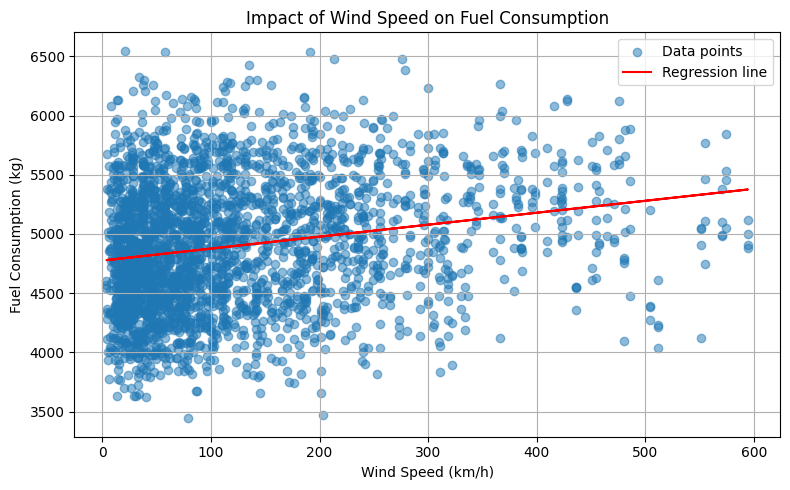

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

merged = pd.read_csv("fuel_wind_merged.csv", low_memory=False)

merged_clean = merged.dropna(subset=['wind_speed', 'fuel_consumption_kg']).copy()

if merged_clean['wind_speed'].nunique() == 1:
    np.random.seed(42)
    merged_clean.loc[:, 'wind_speed'] += np.random.normal(0, 0.1, size=len(merged_clean))

slope, intercept, r_value, p_value, std_err = linregress(
    merged_clean['wind_speed'], merged_clean['fuel_consumption_kg']
)

print("Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
print("\nHypothesis Test:")
print("H₀: Wind speed has no impact on fuel consumption in commercial flights.")
print("H₁: Wind speed has a significant impact on fuel consumption in commercial flights.")

if p_value < alpha:
    print("➡️ Reject the null hypothesis (H₀).")
    print("Conclusion: Wind speed significantly affects fuel consumption.")
else:
    print("➡️ Fail to reject the null hypothesis (H₀).")
    print("Conclusion: No significant effect of wind speed on fuel consumption detected.")

plt.figure(figsize=(8,5))
plt.scatter(merged_clean['wind_speed'], merged_clean['fuel_consumption_kg'], alpha=0.5, label='Data points')
plt.plot(merged_clean['wind_speed'],
         intercept + slope * merged_clean['wind_speed'],
         color='red', label='Regression line')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Fuel Consumption (kg)')
plt.title('Impact of Wind Speed on Fuel Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
